_(tv) 2021-12-20, 2022-01-02_

# Random Walk on 2D Square Lattices

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rng = np.random.default_rng()

This is our random-walk generator: it allows for unequal probabilites of jumping to the different neighboring sites of the 2D square lattice, and calculates the MSD in x-direction and a histogram of final x positions.

In [74]:
class RandomWalk:
    def __init__(self,nsteps,histsize=5000):
        self.nsteps = nsteps
        self.msdx = np.zeros(nsteps)
        self.histox = np.zeros(histsize)
    def run (self,nruns,prob=[1,1,1,1],x0=0,y0=0):
        histo_halfsize = int(self.histox.size/2)
        accu = np.array(prob)
        accu = np.add.accumulate (accu/np.sum(accu))
        print (accu)
        for n in range (nruns):
            x = x0
            y = y0
            self.msdx[0] = 0.0
            for t in range(1,self.nsteps):
                r = rng.random()
                if r < accu[0]: x = x + 1
                elif r < accu[1]: y = y + 1
                elif r < accu[2]: x = x - 1
                else: y = y - 1
                self.msdx[t] += (x-x0)*(x-x0)
            if (x<histo_halfsize and x>=-histo_halfsize):
                self.histox[x-histo_halfsize] += 1
        self.msdx = self.msdx/nruns
        self.histox = self.histox/nruns

## Free Walk

To begin with, here is the free walk:

In [75]:
free_walk = RandomWalk (1000)
free_walk.run (10000)

[0.25 0.5  0.75 1.  ]


The MSD behaves as expected, linear in time. Note that since we have two jump possibilities per direction, the diffusion coefficient in lattice units is 1/4.

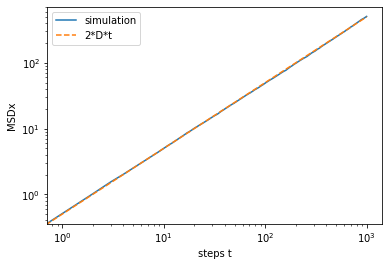

In [87]:
tr=np.arange(free_walk.nsteps)
plt.loglog(tr,free_walk.msdx,label='simulation')
plt.loglog(tr,0.5*tr,ls='dashed',label='2*D*t')
plt.legend()
plt.xlabel('steps t')
plt.ylabel('MSDx')
plt.show()

And the final position of the walker follows the expected Gaussian distribution:

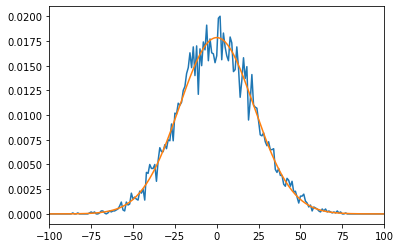

In [80]:
xr=np.arange(free_walk.histox.size)-free_walk.histox.size/2
t=free_walk.nsteps
plt.plot(xr,free_walk.histox)
plt.plot(xr,np.exp(-xr*xr/(t))/np.sqrt(np.pi*t))
plt.xlim([-100,100])
plt.show()

## Walk with Bias Force

A standard way to incorporate an external force acting on the walker, is the set the jump probabilities according to a Boltzmann weight. We do so in the x-direction:

In [89]:
F=1
p = np.array([np.exp(0.5*F),1.,np.exp(-0.5*F),1.])
forced_walk = RandomWalk (1000)
forced_walk.run (1000, prob=p)

[0.38745562 0.62245933 0.76499629 1.        ]


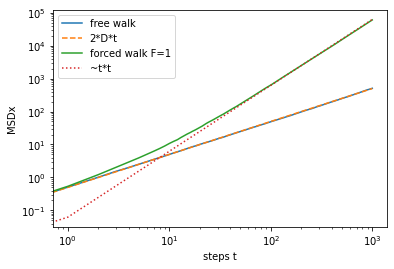

In [96]:
tr=np.arange(free_walk.nsteps)
plt.loglog(tr,free_walk.msdx,label='free walk')
plt.loglog(tr,0.5*tr,ls='dashed',label='2*D*t')
tr=np.arange(forced_walk.nsteps)
plt.loglog(tr,forced_walk.msdx,label='forced walk F=1')
plt.loglog(tr,0.25*tr*tr/4,ls='dotted',label='~t*t')
plt.legend()
plt.xlabel('steps t')
plt.ylabel('MSDx')
plt.show()